In [2]:
pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.2 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# 1. Import Data

In [55]:
df = pd.read_csv('data/temporalidad_1.csv')

In [56]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,ayer,0.531512,0.444552,-0.628866,0.999982,0.558667,0.390358,-0.571893,0.999950,0.573240,...,0.002032,0.0,0.586263,0.369453,0.015787,0.0,0.591011,0.364649,0.016186,0.0
1,ayer,0.523760,0.446381,-0.863971,0.999979,0.555421,0.390054,-0.809736,0.999940,0.570746,...,0.002171,0.0,0.585872,0.367204,0.016905,0.0,0.590366,0.363378,0.017241,0.0
2,ayer,0.520142,0.449467,-0.910053,0.999976,0.553396,0.390142,-0.857819,0.999930,0.569037,...,0.002352,0.0,0.585525,0.366949,0.017286,0.0,0.589961,0.363065,0.017627,0.0
3,ayer,0.518826,0.453118,-0.833561,0.999973,0.552243,0.391160,-0.780878,0.999921,0.567922,...,0.002106,0.0,0.586479,0.367533,0.016694,0.0,0.590912,0.363730,0.017028,0.0
4,ayer,0.516062,0.455297,-0.796919,0.999972,0.550848,0.391820,-0.745363,0.999919,0.567112,...,0.002066,0.0,0.586989,0.367449,0.016398,0.0,0.591427,0.363495,0.016752,0.0


In [57]:
df['class'].unique()

array(['ayer', 'hoy', 'dia'], dtype=object)

In [ ]:
print(df.isnull().sum())  # Valores nulos

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo con el primer landmark (x1, y1)
sns.scatterplot(data=df, x='x1', y='y1', hue='class')
plt.title('Distribución de Coordenadas (x1, y1) por Clase')
plt.show()


# 2. Balancing the data

In [58]:
# Balancing the data
oversampler = RandomOverSampler(sampling_strategy={'hoy': 2000, 'ayer': 2000, 'dia': 2000})


In [59]:
X = df.drop('class', axis=1) # coordenadas
y = df['class'] # clase

In [60]:
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [61]:
print(y_resampled.value_counts())

class
ayer    2000
hoy     2000
dia     2000
Name: count, dtype: int64


# 3. Divide data into training and test

In [62]:
from sklearn.model_selection import train_test_split

# Divide data into training and test, keeping the ratio of classes with stratify
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled)

In [63]:
print(y_train.value_counts())

class
ayer    1400
dia     1400
hoy     1400
Name: count, dtype: int64


In [64]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
2571,0.508068,0.407957,-0.682866,0.999976,0.536850,0.362833,-0.624635,0.999935,0.553084,0.363115,...,0.001134,0.0,0.562601,0.357134,0.008324,0.0,0.567154,0.352656,0.008296,0.0
3837,0.484165,0.399206,-0.679491,0.999989,0.513515,0.357801,-0.617021,0.999948,0.524753,0.360587,...,0.003648,0.0,0.545819,0.351328,0.016915,0.0,0.550278,0.347057,0.017190,0.0
4484,0.546396,0.424332,-0.731849,0.999961,0.571561,0.373835,-0.673974,0.999905,0.585005,0.374848,...,-0.000266,0.0,0.601071,0.353809,0.012256,0.0,0.605618,0.348773,0.012592,0.0
883,0.558285,0.419058,-0.700112,0.999967,0.576823,0.372157,-0.638874,0.999931,0.587572,0.373797,...,0.004036,0.0,0.601411,0.354880,0.018987,0.0,0.605821,0.350545,0.019498,0.0
5503,0.544394,0.422203,-0.701508,0.999962,0.568425,0.373359,-0.647896,0.999911,0.581819,0.374443,...,-0.001128,0.0,0.598649,0.350806,0.010834,0.0,0.602940,0.346741,0.010985,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2889,0.573134,0.405305,-0.672365,0.999990,0.604183,0.362145,-0.601045,0.999950,0.617321,0.365106,...,-0.000704,0.0,0.620723,0.353118,0.008104,0.0,0.625120,0.349986,0.007960,0.0
4835,0.553602,0.416576,-0.721338,0.999964,0.579827,0.368198,-0.657738,0.999923,0.592213,0.369118,...,0.000706,0.0,0.609515,0.358647,0.012230,0.0,0.614701,0.352162,0.012749,0.0
3692,0.483023,0.397762,-0.640792,0.999988,0.511891,0.357917,-0.572580,0.999948,0.523229,0.360815,...,0.004399,0.0,0.545441,0.354508,0.016711,0.0,0.550134,0.348930,0.017151,0.0
2436,0.539635,0.398381,-0.669101,0.999985,0.562940,0.351986,-0.603981,0.999965,0.576823,0.354214,...,0.003427,0.0,0.587646,0.348438,0.015477,0.0,0.592151,0.344718,0.015857,0.0


In [65]:
y_train

2571    ayer
3837     dia
4484     hoy
883      hoy
5503     hoy
        ... 
2889     dia
4835     hoy
3692     dia
2436    ayer
3684     dia
Name: class, Length: 4200, dtype: object

# 4. Train models

In [66]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [67]:
pipelines = {
    'lr':make_pipeline(LogisticRegression(C=0.01, max_iter=500)),
    'rc':make_pipeline(RidgeClassifier()),
    'rf':make_pipeline(RandomForestClassifier()),
    #'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
    #'svm':make_pipeline(StandardScaler(), SVC())
}

In [68]:
pipelines.keys()

dict_keys(['lr', 'rc', 'rf'])

In [69]:
print(y_train.value_counts())

class
ayer    1400
dia     1400
hoy     1400
Name: count, dtype: int64


In [49]:
X_train

,x1,y1,z1,v1,x2,y2,z2,v2,x3,y3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
3836,0.518700,0.399306,-0.481796,0.999980,0.540028,0.357416,-0.396570,0.999944,0.552362,0.359249,...,0.003272,0.0,0.544232,0.352282,0.018707,0.0,0.549011,0.348313,0.019111,0.0
220,0.536818,0.399952,-0.688830,0.999986,0.560626,0.352237,-0.625134,0.999969,0.573428,0.354956,...,0.003598,0.0,0.587642,0.347785,0.016142,0.0,0.592197,0.344059,0.016568,0.0
3276,0.579333,0.423855,-0.534365,0.999986,0.602362,0.381858,-0.456878,0.999956,0.614665,0.383895,...,0.002901,0.0,0.615096,0.367638,0.017337,0.0,0.619621,0.363451,0.017688,0.0
2622,0.530403,0.417293,-0.797316,0.999974,0.558823,0.365461,-0.740828,0.999942,0.571860,0.367140,...,0.006660,0.0,0.597539,0.347786,0.022278,0.0,0.602408,0.343315,0.023016,0.0
3888,0.465938,0.396266,-0.775581,0.999979,0.494140,0.350799,-0.708731,0.999915,0.509005,0.353643,...,0.002325,0.0,0.524054,0.341899,0.015379,0.0,0.528287,0.337936,0.015690,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3177,0.466756,0.393594,-0.733008,0.999979,0.494658,0.348617,-0.653624,0.999924,0.509429,0.351448,...,0.003090,0.0,0.518602,0.345542,0.015319,0.0,0.523283,0.339585,0.015919,0.0
1414,0.523207,0.429670,-0.717456,0.999952,0.554174,0.369618,-0.667819,0.999872,0.568748,0.370613,...,0.003473,0.0,0.589207,0.337838,0.013898,0.0,0.594159,0.333470,0.014154,0.0
2589,0.530072,0.406447,-0.637397,0.999950,0.555616,0.358371,-0.573608,0.999879,0.569310,0.360218,...,0.005618,0.0,0.585358,0.348655,0.018200,0.0,0.590159,0.343456,0.018857,0.0
2762,0.522371,0.430156,-0.773755,0.999959,0.548706,0.373400,-0.721183,0.999897,0.562181,0.374022,...,0.001538,0.0,0.579027,0.348776,0.015435,0.0,0.583814,0.344245,0.015991,0.0


In [70]:
fit_models = {}
predictions = {}
for clave_model, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fit_models[clave_model] =  model
    predictions[clave_model] = y_pred
fit_models

{'lr': Pipeline(steps=[('logisticregression',
                  LogisticRegression(C=0.01, max_iter=500))]),
 'rc': Pipeline(steps=[('ridgeclassifier', RidgeClassifier())]),
 'rf': Pipeline(steps=[('randomforestclassifier', RandomForestClassifier())])}

In [71]:
predictions

{'lr': array(['ayer', 'dia', 'dia', ..., 'hoy', 'hoy', 'hoy'], dtype=object),
 'rc': array(['ayer', 'dia', 'dia', ..., 'hoy', 'hoy', 'hoy'], dtype='<U4'),
 'rf': array(['ayer', 'dia', 'dia', ..., 'hoy', 'hoy', 'hoy'], dtype=object)}

# 5. Evaluate models

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  classification_report #Metricas

# Calculate accuracy, precision y recall for each model
evaluations = {}
for clave_model, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)  # Usamos output_dict=True para guardar los datos en formato diccionario
    evaluations[clave_model] = {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall']
    }

# Mostrar resultados
for clave_model, metrics in evaluations.items():
    print(f"Modelo: {clave_model}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Precisión (weighted avg): {metrics['precision']}")
    print(f"Recall (weighted avg): {metrics['recall']}\n")


Modelo: lr
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rc
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0

Modelo: rf
Accuracy: 1.0
Precisión (weighted avg): 1.0
Recall (weighted avg): 1.0



## 5.1 Validacion cruzada

In [73]:
from sklearn.model_selection import cross_val_score

for clave_model, pipeline in pipelines.items():
    scores = cross_val_score(pipeline, X, y, cv=5)
    print(f"Precisión media de validación cruzada para {clave_model}: {scores.mean()}")


KeyboardInterrupt: 

## 5.2 Hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos los hiperparámetros a probar para cada modelo
param_grid = {
    'lr': {
        'logisticregression__C': [0.1, 1, 10, 100],  # Regularización
        'logisticregression__solver': ['liblinear', 'lbfgs']
    },
    'rf': {
        'randomforestclassifier__n_estimators': [50, 100, 200],  # Número de árboles
        'randomforestclassifier__max_depth': [None, 10, 20, 30],  # Profundidad máxima
        'randomforestclassifier__min_samples_split': [2, 5, 10]  # Mínimas muestras para hacer split
    },
    'svm': {
        'svc__C': [0.1, 1, 10, 100],  # Regularización
        'svc__gamma': [1, 0.1, 0.01, 0.001],  # Coeficiente del kernel
        'svc__kernel': ['linear', 'rbf']  # Tipos de kernel
    }
}

# Inicializamos el diccionario para guardar los mejores modelos encontrados con GridSearchCV
best_models = {}

# Aplicamos GridSearchCV a cada modelo
for clave_model, param in param_grid.items():
    grid = GridSearchCV(pipelines[clave_model], param_grid=param, cv=5, n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    
    # Guardamos el mejor modelo
    best_models[clave_model] = grid.best_estimator_
    
    print(f"Mejores parámetros para {clave_model}: {grid.best_params_}")
    print(f"Mejor precisión con validación cruzada: {grid.best_score_}")


## 5.3 Matriz de confusión

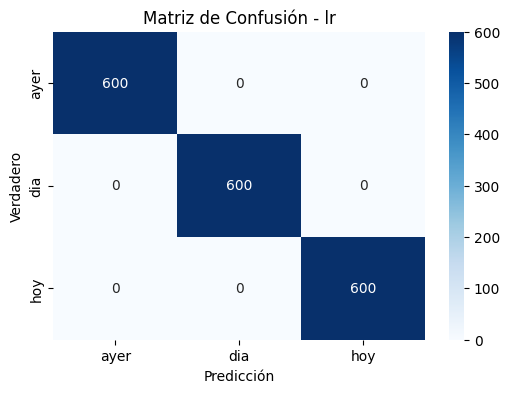

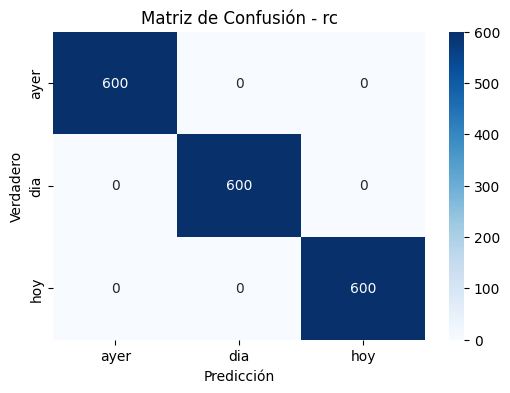

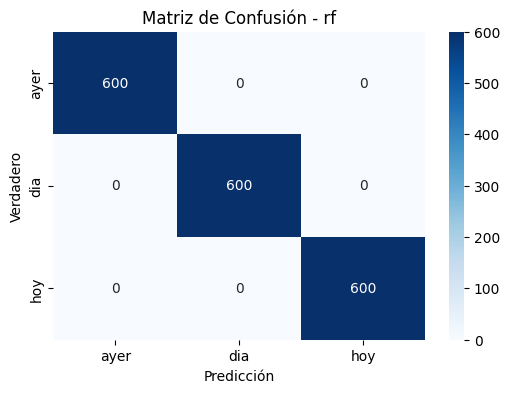

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Crear las matrices de confusión y visualizarlas
for clave_model, y_pred in predictions.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_,
            yticklabels=model.classes_)
    plt.title(f'Matriz de Confusión - {clave_model}')
    plt.xlabel('Predicción')
    plt.ylabel('Verdadero')
    plt.show()


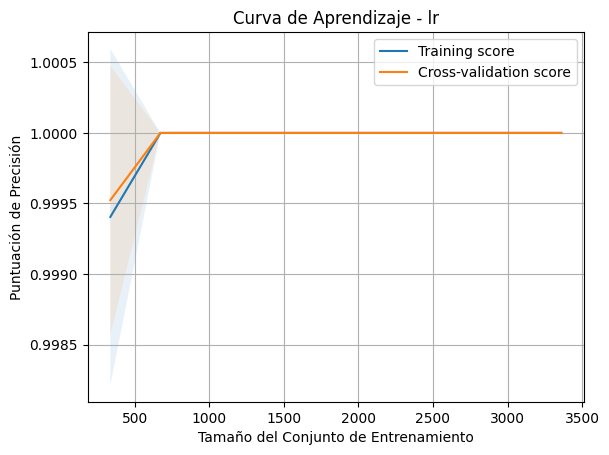

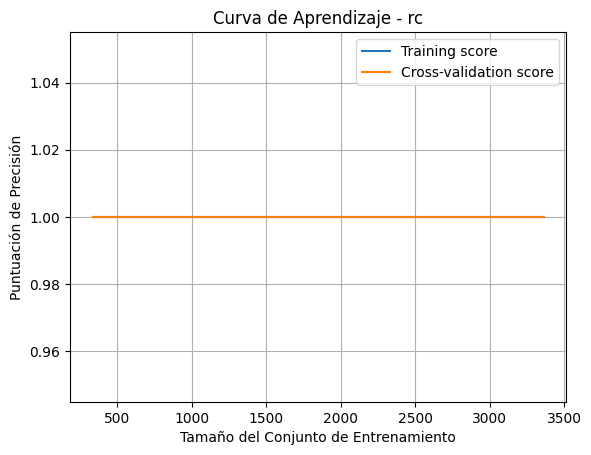

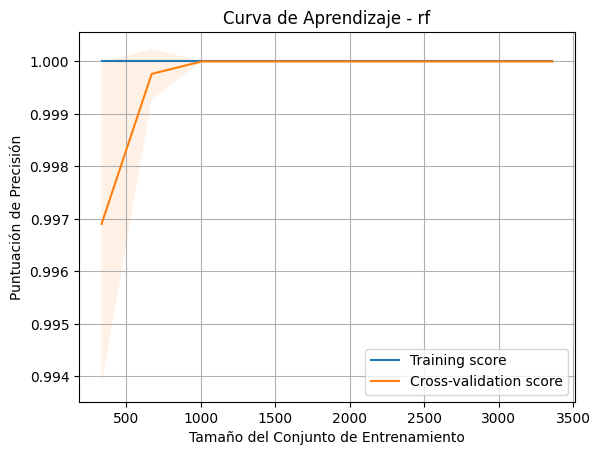

In [75]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Crear curvas de aprendizaje para cada modelo
for algo, model in fit_models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calcular la media y la desviación estándar de los puntajes
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    plt.title(f"Curva de Aprendizaje - {algo}")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación de Precisión")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
